## Observations and Insights

Overall observation suggests there are no outliers in this research, furthermore, the data suggest the mice with heavier weight tended to gernerally have larger volume tumors. When comparing the time point versus tumor volume for a younger mouse with the same starting volume of tumoer vs older mouse treated with Capomulin, the results seems to be faily similar at first glance. After further analysis the younger mouse tumor size after 40 treatments continue to fall, while the older mouse tumor volume seems to be no be affected by the treatement. 

In [ ]:
sort1 = mouse_study.loc[mouse_study['Drug Regimen']== 'Capomulin']
mousedata = sort1.loc[sort1['Mouse ID']=='s185']
plt.plot(mousedata['Timepoint'], mousedata['Tumor Volume (mm3)'])
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Mouse Data for Capomulin')
plt.show()

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)



In [35]:
mouse_metadata.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
5,s508,Ramicane,Male,1,17
6,f966,Capomulin,Male,16,17
7,m546,Ramicane,Male,18,16
8,z578,Ramicane,Male,11,16
9,j913,Ramicane,Female,4,17


In [3]:
mouse_metadata.count()

Mouse ID        249
Drug Regimen    249
Sex             249
Age_months      249
Weight (g)      249
dtype: int64

In [4]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [40]:
# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID"])

mouse_study.head(50)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [6]:
#Generate a summary statistics table consisting of the mean.

drug_mean = mouse_study.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
drug_mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.322552
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [7]:
# median 
drug_median = mouse_study.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
drug_median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.854632
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [8]:
# variance
drug_var = mouse_study.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
drug_var

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     42.351070
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [9]:
# standard deviation, and SEM of the tumor volume for each drug regimen
drug_sd = mouse_study.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
drug_sd

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.507770
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [10]:
drug_SEM = mouse_study.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
drug_SEM

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.512884
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

## Summary statistics

In [11]:
drug_df = pd.DataFrame({
    "Drug Regimen Average":drug_mean,
    "Drug Regimen Median":drug_median,
    "Drug Regimen Variance":drug_var,
    "Drug Regimen Standard Deviation":drug_sd,
    "Drug Regimen SEM":drug_SEM
})
drug_df

,Drug Regimen Average,Drug Regimen Median,Drug Regimen Variance,Drug Regimen Standard Deviation,Drug Regimen SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

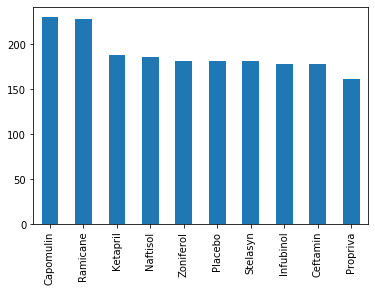

In [12]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
drug_plot = mouse_study["Drug Regimen"].value_counts()
drug_plot.plot(kind='bar')
               

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

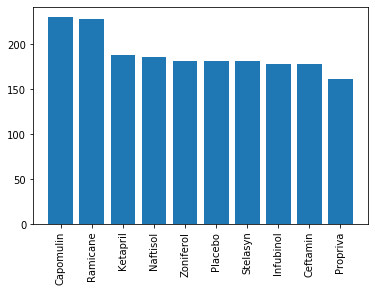

In [13]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
plt.bar(drug_plot.index.values, drug_plot.values)
plt.xticks(rotation=90)


## Pie plots

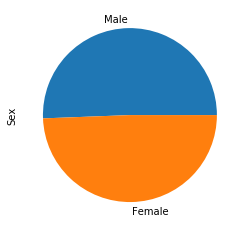

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
g_plot = mouse_study["Sex"].value_counts()
g_plot.plot(kind='pie')

In [15]:
explode = (0.2, 0)
labels = ("Male", "Female")
colors = ("blue", "pink")

([<matplotlib.patches.Wedge at 0x1ff5c696940>,
 [Text(-1.2997632467213867, -0.0248093222857827, 'Male'),
  Text(1.0997996703027118, 0.020992503472585713, 'Female')],
 [Text(-0.7998543056746995, -0.015267275252789354, '50.6%'),
  Text(0.5998907292560246, 0.011450456439592206, '49.4%')])

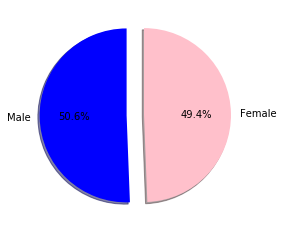

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(g_plot, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)

## Quartiles, outliers and boxplots

In [17]:
# four of the most promising treatment regimens.
drug_df["Drug Regimen SEM"].sort_values(ascending=False)

Drug Regimen
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Stelasyn     0.573111
Zoniferol    0.516398
Propriva     0.512884
Infubinol    0.492236
Ceftamin     0.469821
Capomulin    0.329346
Ramicane     0.320955
Name: Drug Regimen SEM, dtype: float64

In [18]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
max_tumor = study_results.groupby(["Mouse ID"])['Timepoint'].max()
max_tumor = max_tumor.reset_index()
max_tumor.head()

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30


In [37]:
mergedata = max_tumor[['Mouse ID', 'Timepoint']].merge(mouse_study, on=['Mouse ID','Timepoint'],how="left")
mergedata.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [20]:
infubinol = mergedata.loc[mergedata["Drug Regimen"] == "Infubinol"]['Tumor Volume (mm3)']
infubinol.head()

0     67.973419
1     65.525743
11    57.031862
13    66.083066
27    72.226731
Name: Tumor Volume (mm3), dtype: float64

In [21]:
ramicane = mergedata.loc[mergedata["Drug Regimen"] == "Ramicane"]['Tumor Volume (mm3)']
ramicane.head()

6     38.407618
7     43.047543
10    38.810366
12    32.978522
33    38.342008
Name: Tumor Volume (mm3), dtype: float64

In [22]:
capomulin = mergedata.loc[mergedata["Drug Regimen"] == "Capomulin"]['Tumor Volume (mm3)']
capomulin.head()

19    38.982878
24    38.939633
61    30.485985
64    37.074024
66    40.159220
Name: Tumor Volume (mm3), dtype: float64

In [23]:
ceftamin = mergedata.loc[mergedata["Drug Regimen"] == "Ceftamin"]['Tumor Volume (mm3)']
ceftamin.head()

3     62.999356
21    45.000000
22    56.057749
25    55.742829
58    48.722078
Name: Tumor Volume (mm3), dtype: float64

In [24]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.
quartiles = capomulin.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
iqr
quartiles

0.25    32.377357
0.50    38.125164
0.75    40.159220
Name: Tumor Volume (mm3), dtype: float64

In [25]:
quartiles2 = ramicane.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
quartiles2

0.25    31.560470
0.50    36.561652
0.75    40.659006
Name: Tumor Volume (mm3), dtype: float64

In [26]:
quartiles3 = infubinol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
quartiles3

0.25    54.048608
0.50    60.165180
0.75    65.525743
Name: Tumor Volume (mm3), dtype: float64

In [27]:
quartiles4 = ceftamin.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
quartiles4

0.25    48.722078
0.50    59.851956
0.75    64.299830
Name: Tumor Volume (mm3), dtype: float64

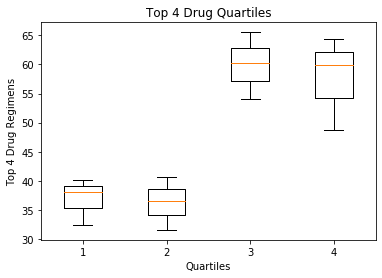

In [28]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.boxplot([quartiles, quartiles2, quartiles3, quartiles4])
plt.xlabel('Quartiles')
plt.ylabel('Top 4 Drug Regimens')
plt.title('Top 4 Drug Quartiles')
plt.show()

## Line and scatter plots

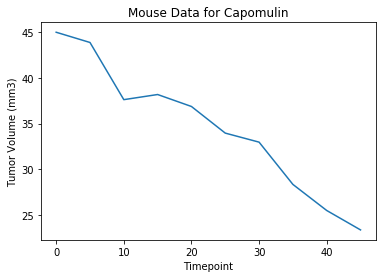

In [44]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#plt.plot(['Timepoint', "Capomulin"])
sort1 = mouse_study.loc[mouse_study['Drug Regimen']== 'Capomulin']
mousedata = sort1.loc[sort1['Mouse ID']=='s185']
plt.plot(mousedata['Timepoint'], mousedata['Tumor Volume (mm3)'])
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Mouse Data for Capomulin')
plt.show()


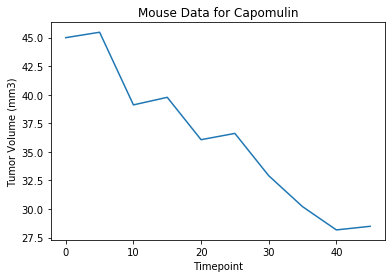

In [42]:
sort1 = mouse_study.loc[mouse_study['Drug Regimen']== 'Capomulin']
mousedata = sort1.loc[sort1['Mouse ID']=='x401']
plt.plot(mousedata['Timepoint'], mousedata['Tumor Volume (mm3)'])
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Mouse Data for Capomulin')
plt.show()

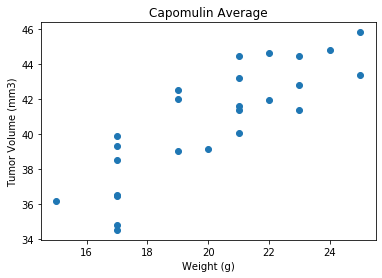

In [30]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
sort2 = mouse_study.loc[mouse_study['Drug Regimen']== 'Capomulin']
capomulin_avg = sort2.groupby(['Mouse ID']).mean()
plt.scatter(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Average')
plt.show()


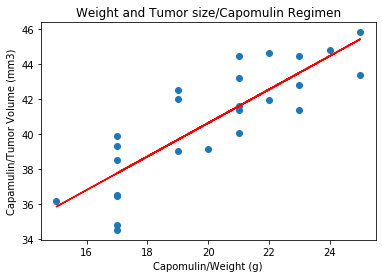

In [31]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
correalation = st.pearsonr(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])[0],2
model = st.linregress(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])
y_values = capomulin_avg['Weight (g)']* model[0]+model[1]
plt.scatter(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'])
plt.plot(capomulin_avg['Weight (g)'], y_values, color = 'red')
plt.xlabel("Capomulin/Weight (g)")
plt.ylabel("Capamulin/Tumor Volume (mm3)")
plt.title('Weight and Tumor size/Capomulin Regimen')
plt.show()
